In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
df['date']=pd.to_datetime(dict(year=df.year,month=df.month,day=df.day))
date=df.pop('date')
df.insert(0,'date',date)

In [3]:
df.sort_values(['date'],inplace=True)
df.reset_index(inplace=True,drop=True)
#df.set_index('date',inplace=T)
df['air temp.'].fillna(np.random.normal(np.mean(df['air temp.']),np.std(df['air temp.'])),inplace=True)
df['zon.winds'].fillna(np.random.normal(np.mean(df['zon.winds']),np.std(df['zon.winds'])),inplace=True)
df['mer.winds'].fillna(np.random.normal(np.mean(df['mer.winds']),np.std(df['mer.winds'])),inplace=True)
df['humidity'].fillna(np.random.normal(np.mean(df['humidity']),np.std(df['humidity'])),inplace=True)

x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,KBinsDiscretizer, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [5]:
tss=TimeSeriesSplit(n_splits=3)
for train,test in tss.split(x):
    x_train,x_test=x.iloc[train,:],x.iloc[test,:]
    y_train,y_test=y.iloc[train],y.iloc[test]

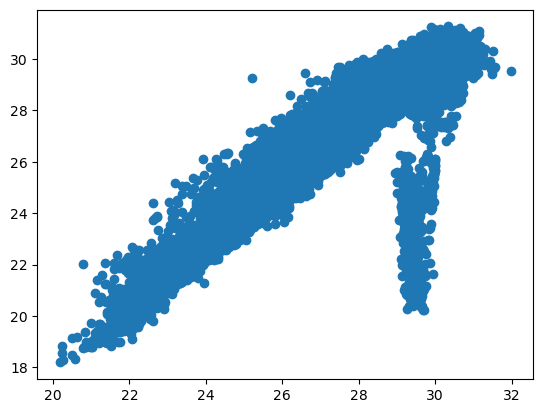

In [6]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',LinearRegression())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [7]:
mean_absolute_error(y_test,pred)

0.6479114899583607

In [8]:
root_mean_squared_error(y_test,pred)

1.0848872657631183

In [9]:
r2_score(y_test,pred)

0.7864134917934609

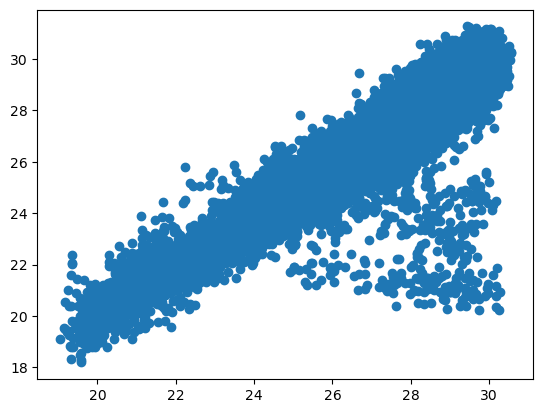

In [10]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',KNeighborsRegressor())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [11]:
mean_absolute_error(y_test,pred)

0.5676697571067352

In [12]:
root_mean_squared_error(y_test,pred)

0.9118404587118829

In [13]:
r2_score(y_test,pred)

0.8491163057231591

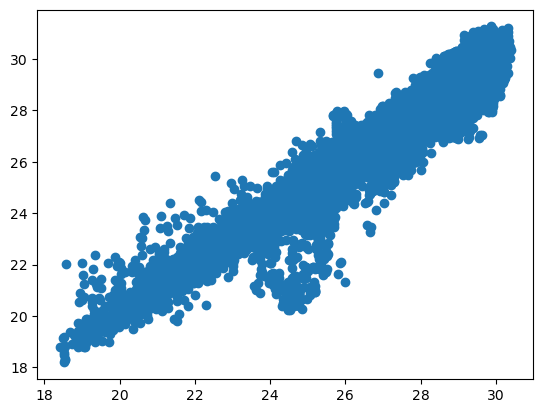

In [14]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',RandomForestRegressor())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [15]:
mean_absolute_error(y_test,pred)

0.43138041146272343

In [16]:
root_mean_squared_error(y_test,pred)

0.5996531781268422

In [17]:
r2_score(y_test,pred)

0.9347463405325064

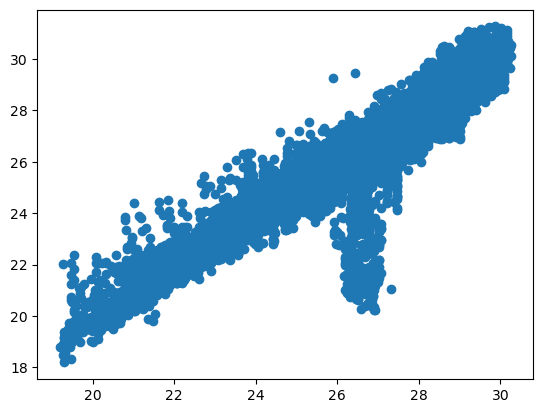

In [18]:
mod=Pipeline([('scale',StandardScaler()),
              ('model',GradientBoostingRegressor())])
mod=GridSearchCV(estimator=mod,
                 param_grid={},
                 cv=3)
mod.fit(X=x_train,y=y_train)
pred=mod.predict(x_test)
plt.scatter(pred,y_test)

In [19]:
mean_absolute_error(y_test,pred)

0.4676111012295652

In [20]:
root_mean_squared_error(y_test,pred)

0.7038601309315118

In [21]:
r2_score(y_test,pred)

0.9100963498772451